In [1]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [3]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3088384/45929032 bytes (6.7%)7020544/45929032 bytes (15.3%)11018240/45929032 bytes (24.0%)14999552/45929032 bytes (32.7%)18997248/45929032 bytes (41.4%)23117824/45929032 bytes (50.3%)27271168/45929032 bytes (59.4%)30040064/45929032 bytes (65.4%)33234944/45929032 bytes (72.4%)36732928/45929032 bytes (80.0%)40722432/45929032 bytes (88.7%)44908544/45929032 bytes (97.8%)

In [6]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [7]:
def addVertex(a,b):
  gl.glVertex2f( a/(WIDTH/2), b/(HEIGHT/2))

Question 2

In [8]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(1,1,1)
gl.glPointSize(5)

#Upper Triangle
gl.glBegin(gl.GL_TRIANGLES)
addVertex(-200,-2)
addVertex(200,-2)
addVertex(0,200)
gl.glEnd()

#Right Line
gl.glBegin(gl.GL_LINE_STRIP)
addVertex(190,-2)
addVertex(190,-250)
gl.glEnd()


#Left Line
gl.glBegin(gl.GL_LINE_STRIP)
addVertex(-190,-2)
addVertex(-190,-250)
gl.glEnd()


#Bottom  Line
gl.glBegin(gl.GL_LINE_STRIP)
addVertex(190,-250)
addVertex(-190,-250)
gl.glEnd()


#Left Window

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(-100,-10)
addVertex(-170,-10)
gl.glEnd()

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(-100,-80)
addVertex(-170,-80)
gl.glEnd()

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(-100,-10)
addVertex(-100,-80)
gl.glEnd()

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(-170,-10)
addVertex(-170,-80)
gl.glEnd()


#Right Window

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(100,-10)
addVertex(170,-10)
gl.glEnd()

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(100,-80)
addVertex(170,-80)
gl.glEnd()

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(100,-10)
addVertex(100,-80)
gl.glEnd()

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(170,-10)
addVertex(170,-80)
gl.glEnd()


#Door

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(-40,-50)
addVertex(30,-50)
gl.glEnd()

gl.glBegin(gl.GL_LINE_STRIP)
addVertex(-40,-50)
addVertex(-40,-250)
gl.glEnd()


gl.glBegin(gl.GL_LINE_STRIP)
addVertex(30,-50)
addVertex(30,-250)
gl.glEnd()


#Door Knob

gl.glBegin(gl.GL_POINTS)
addVertex(20,-120)
gl.glEnd()










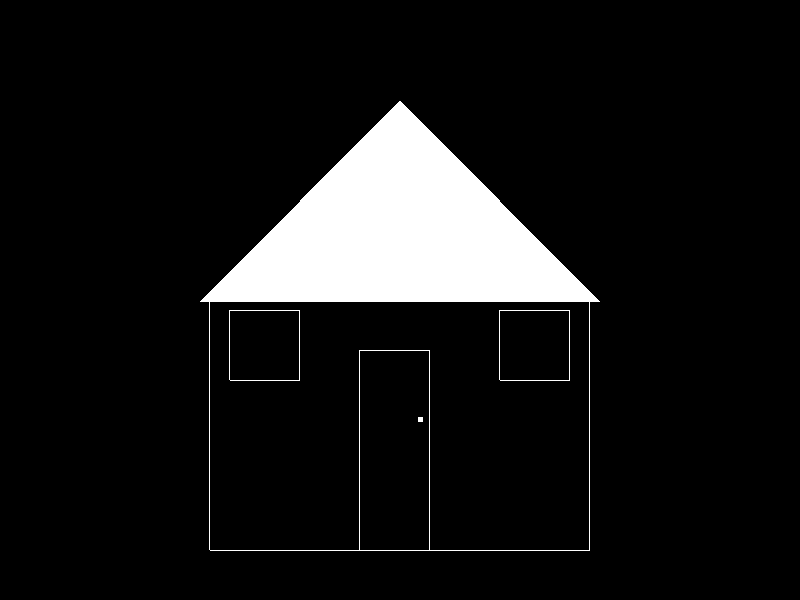

In [9]:
#Display Function

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)